In [196]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
from sklearn.preprocessing import LabelEncoder



| Heart Disease Dataset Attribute Description |                                           |                     |                 |           |
| ------------------------------------------- |-------------------------------------------|---------------------| --------------- | --------- |
|                                             |                                           |                     |                 |           |
| S.No.                                       | Attribute                                 | Code given          | Unit            | Data type |
| 1                                           | Age                                       | Age                 | in years        | Numeric   |
| 2                                           | Sex                                       | Sex                 | 1, 0            | Binary    |
| 3                                           | Chest pain type                           | Chest pain type     | 1,2,3,4         | Nominal   |
| 4                                           | Resting blood pressure                    | Resting bp s        | in mm Hg        | Numeric   |
| 5                                           | Serum cholesterol                         | Cholesterol         | in mg/dl        | Numeric   |
| 6                                           | Fasting blood sugar                       | Fasting blood sugar | 1,0 > 120 mg/dl | Binary    |
| 7                                           | Resting electrocardiogram results         | Resting ecg         | 0,1,2           | Nominal   |
| 8                                           | Maximum heart rate achieved               | Max heart rate      | 71-202          | Numeric   |
| 9                                           | Exercise induced angina                   | Exercise angina     | 0,1             | Binary    |
| 10                                          | Oldpeak =ST                               | Oldpeak             | depression      | Numeric   |
| 11                                          | The slope of the peak exercise ST segment | ST slope            | 0,1,2           | Nominal   |
| 12                                          | Class                                     | Target              | 0,1             | Binary    |


| Attribute                          | Description                                                                                               |
|------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Sex                                | 1 = male, 0 = female;                                                                                     |
| Chest Pain Type                    | Value 1: Typical angina                                                                                   |
|                                    | Value 2: Atypical angina                                                                                  |
|                                    | Value 3: Non-anginal pain                                                                                 |
|                                    | Value 4: Asymptomatic                                                                                     |
| Fasting Blood Sugar                | Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)                                                    |
|                                    |                                                                                                           |
| Resting  electrocardiogram results | Value 0: Normal                                                                                           |
|                                    | Value 1: Having ST-T wave abnormality (T wave inversions) and/or ST elevation or depression of > 0.05 mV) |
|                                    | Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria                     |
| Exercise induced angina            | 1 = yes; 0 = no                                                                                           |
|                                    |                                                                                                           |
| The slope of the  Peak exercise ST | Value 1: Upsloping                                                                                        |
|                                    | Value 2: Flat|
|                                    | Value 3: Downsloping                                                                                      |
| Class                              | 1 = Heart disease, 0 = Normal                                                                             |

In [197]:
from pandas import read_csv
#fatality   = read_csv('../datasets/fatalityDataset/heart_failure_clinical_records_dataset.csv')
disease     = read_csv('../datasets/diseaseDataset/heart_statlog_cleveland_hungary_final.csv')
disease.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [198]:
disease.dtypes.T

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [199]:
disease.describe().T

count        mean         std   min    25%    50%  \
age                  1190.0   53.720168    9.358203  28.0   47.0   54.0   
sex                  1190.0    0.763866    0.424884   0.0    1.0    1.0   
chest pain type      1190.0    3.232773    0.935480   1.0    3.0    4.0   
resting bp s         1190.0  132.153782   18.368823   0.0  120.0  130.0   
cholesterol          1190.0  210.363866  101.420489   0.0  188.0  229.0   
fasting blood sugar  1190.0    0.213445    0.409912   0.0    0.0    0.0   
resting ecg          1190.0    0.698319    0.870359   0.0    0.0    0.0   
max heart rate       1190.0  139.732773   25.517636  60.0  121.0  140.5   
exercise angina      1190.0    0.387395    0.487360   0.0    0.0    0.0   
oldpeak              1190.0    0.922773    1.086337  -2.6    0.0    0.6   
ST slope             1190.0    1.624370    0.610459   0.0    1.0    2.0   
target               1190.0    0.528571    0.499393   0.0    0.0    1.0   

                        75%    max  
age                   60.00   77.0  
sex                    1.00    1.0  
chest pain type        4.00    4.0  
resting bp s         140.00  200.0  
cholesterol          269.75  603.0  
fasting blood sugar    0.00    1.0  
resting ecg            2.00    2.0  
max heart rate       160.00  202.0  
exercise angina        1.00    1.0  
oldpeak                1.60    6.2  
ST slope               2.00    3.0  
target                 1.00    1.0

In [200]:
px.imshow(disease.corr(),title="Correlation Plot")

In [201]:
fig=px.histogram(disease, 
                 x     = "target",
                 color = "sex",
                 hover_data = disease.columns,
                 title = "Distribution of Heart Diseases",
                 barmode = "group")
fig.show()

In [202]:
fig=px.histogram(disease,
                 x="chest pain type",
                 color      = "sex",
                 hover_data = disease.columns,
                 title      = "Types of Chest Pain"
                )
fig.show()

In [223]:
fig=px.histogram(disease,
                 x="sex",
                 hover_data=disease.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [224]:
fig=px.histogram(disease,
                 x          =   "resting ecg",
                 hover_data =   disease.columns,
                 title      =   "Distribution of Resting ECG")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

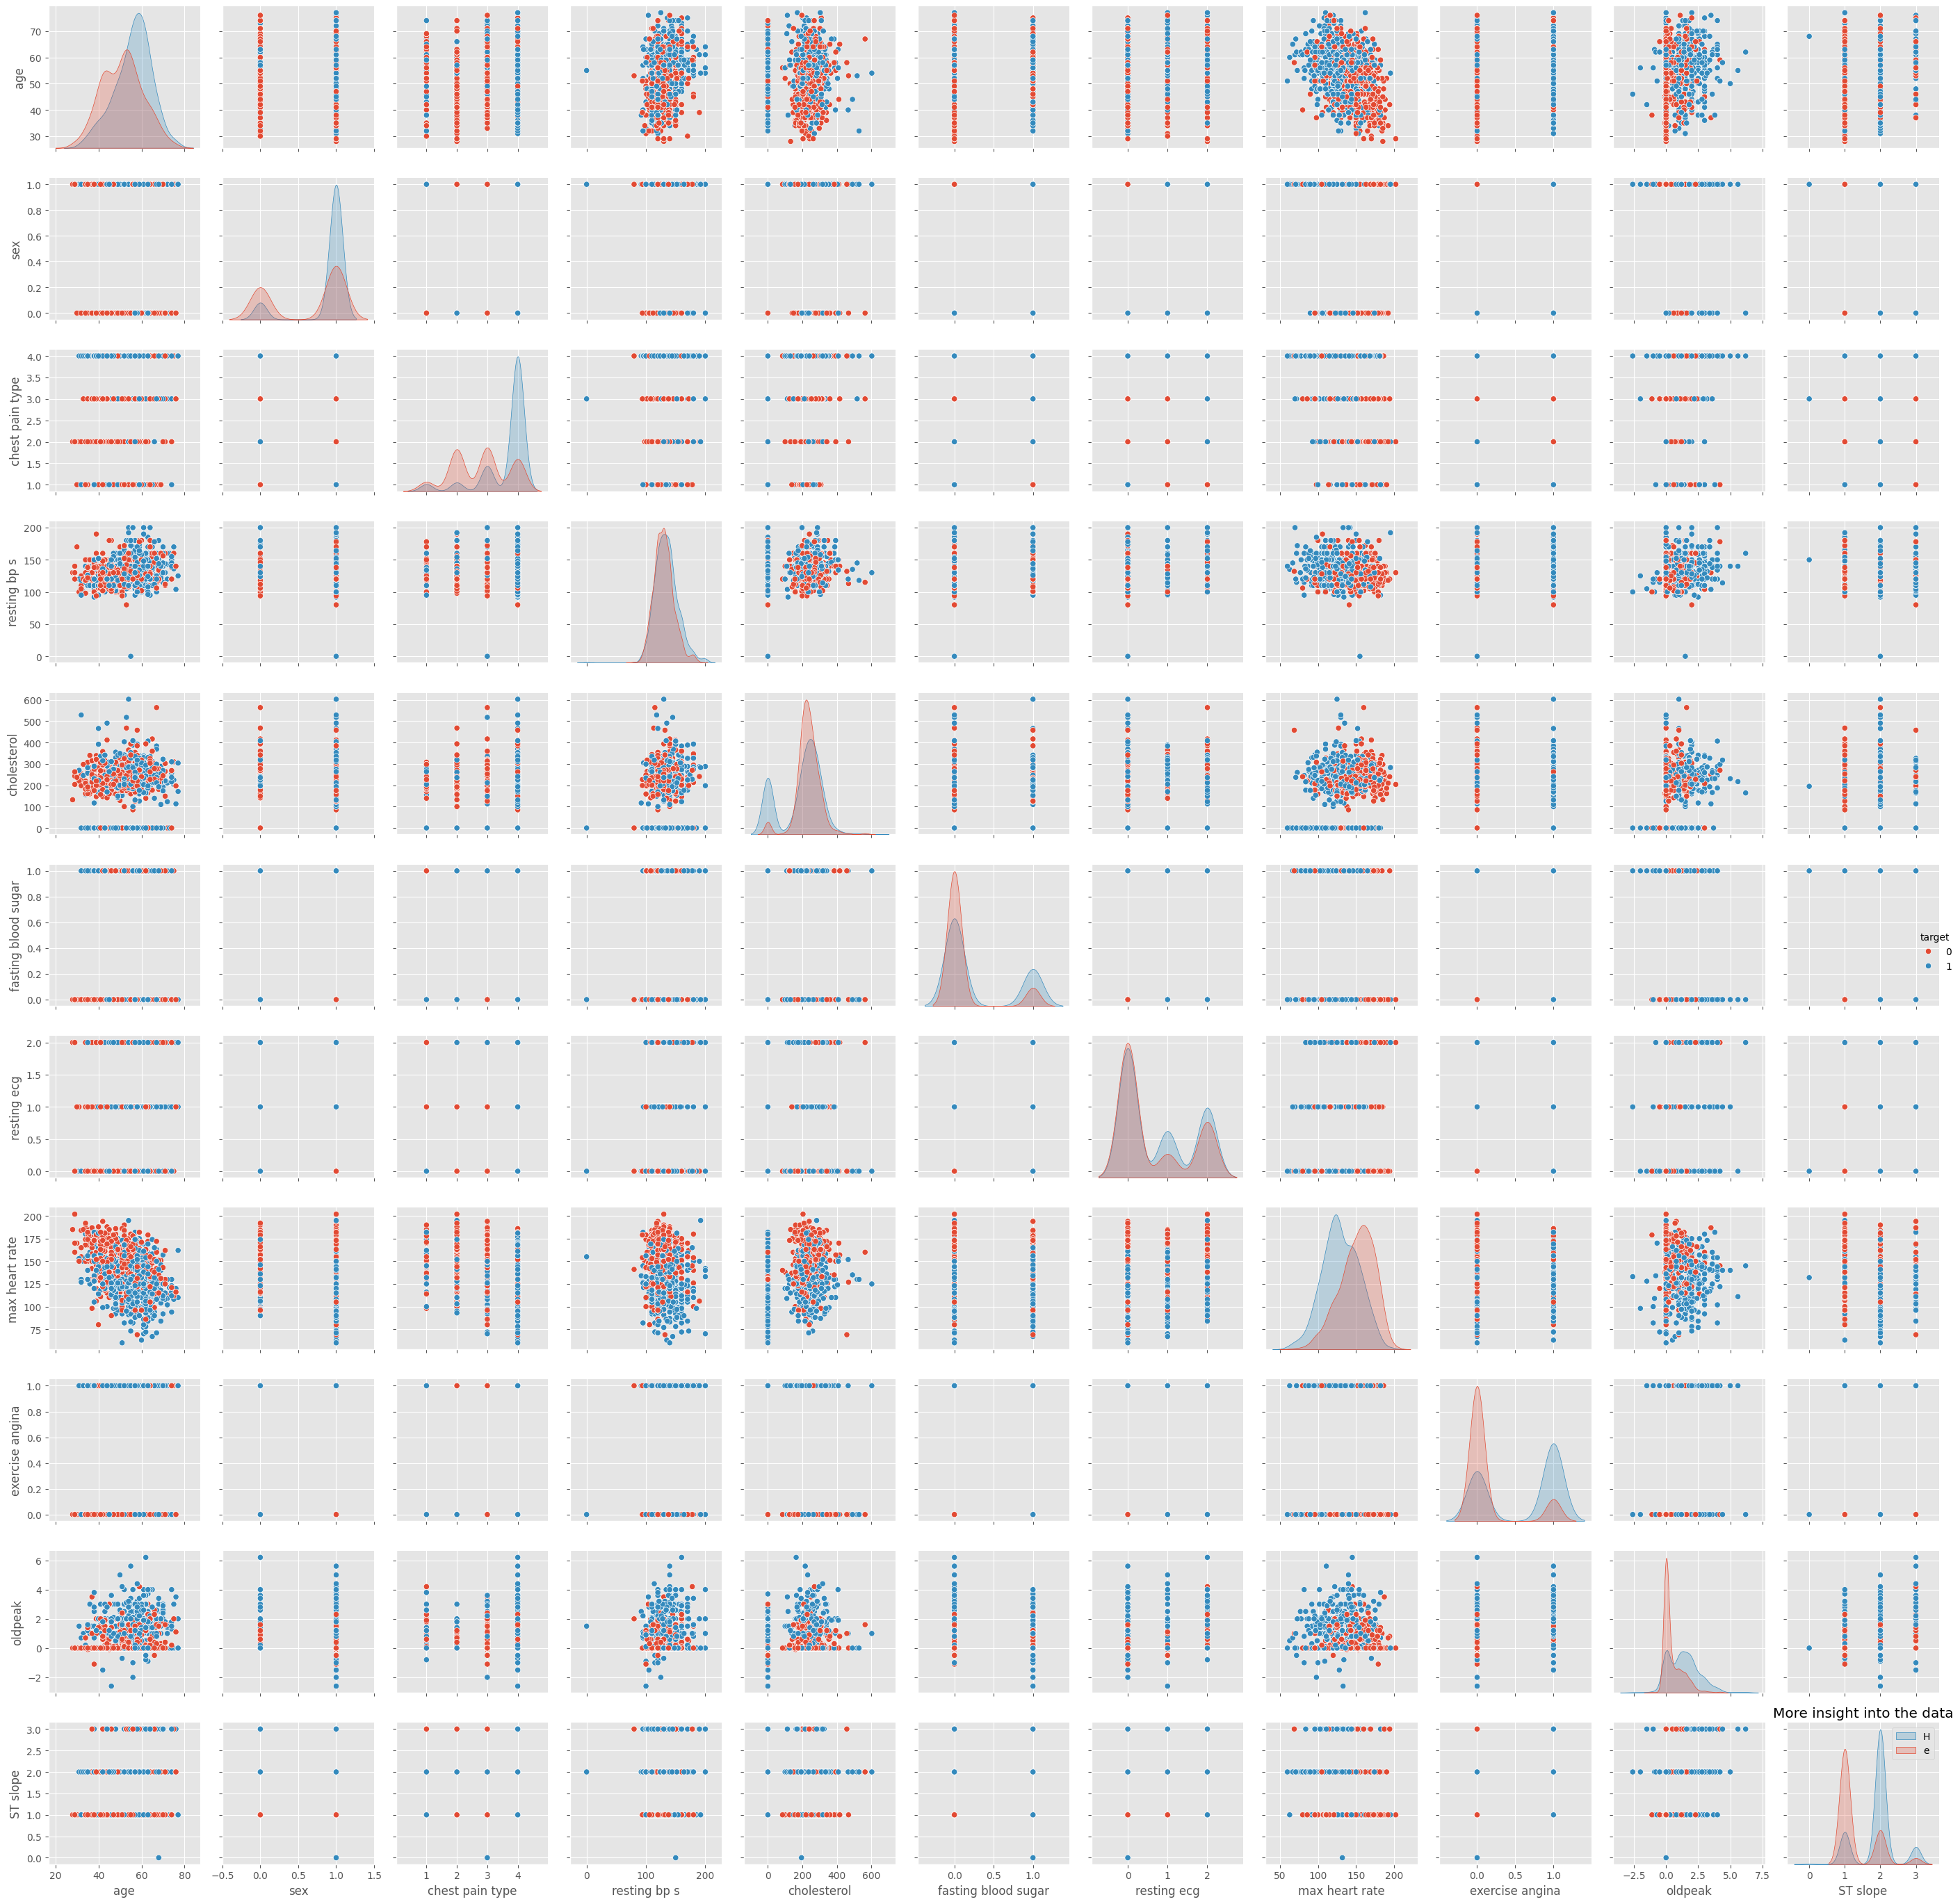

In [225]:
plt.figure(figsize=(15,10))
sns.pairplot(disease, hue="target")
plt.title("More insight into the data")
plt.legend("Heart Disease Dataset")
plt.tight_layout()
plt.plot()

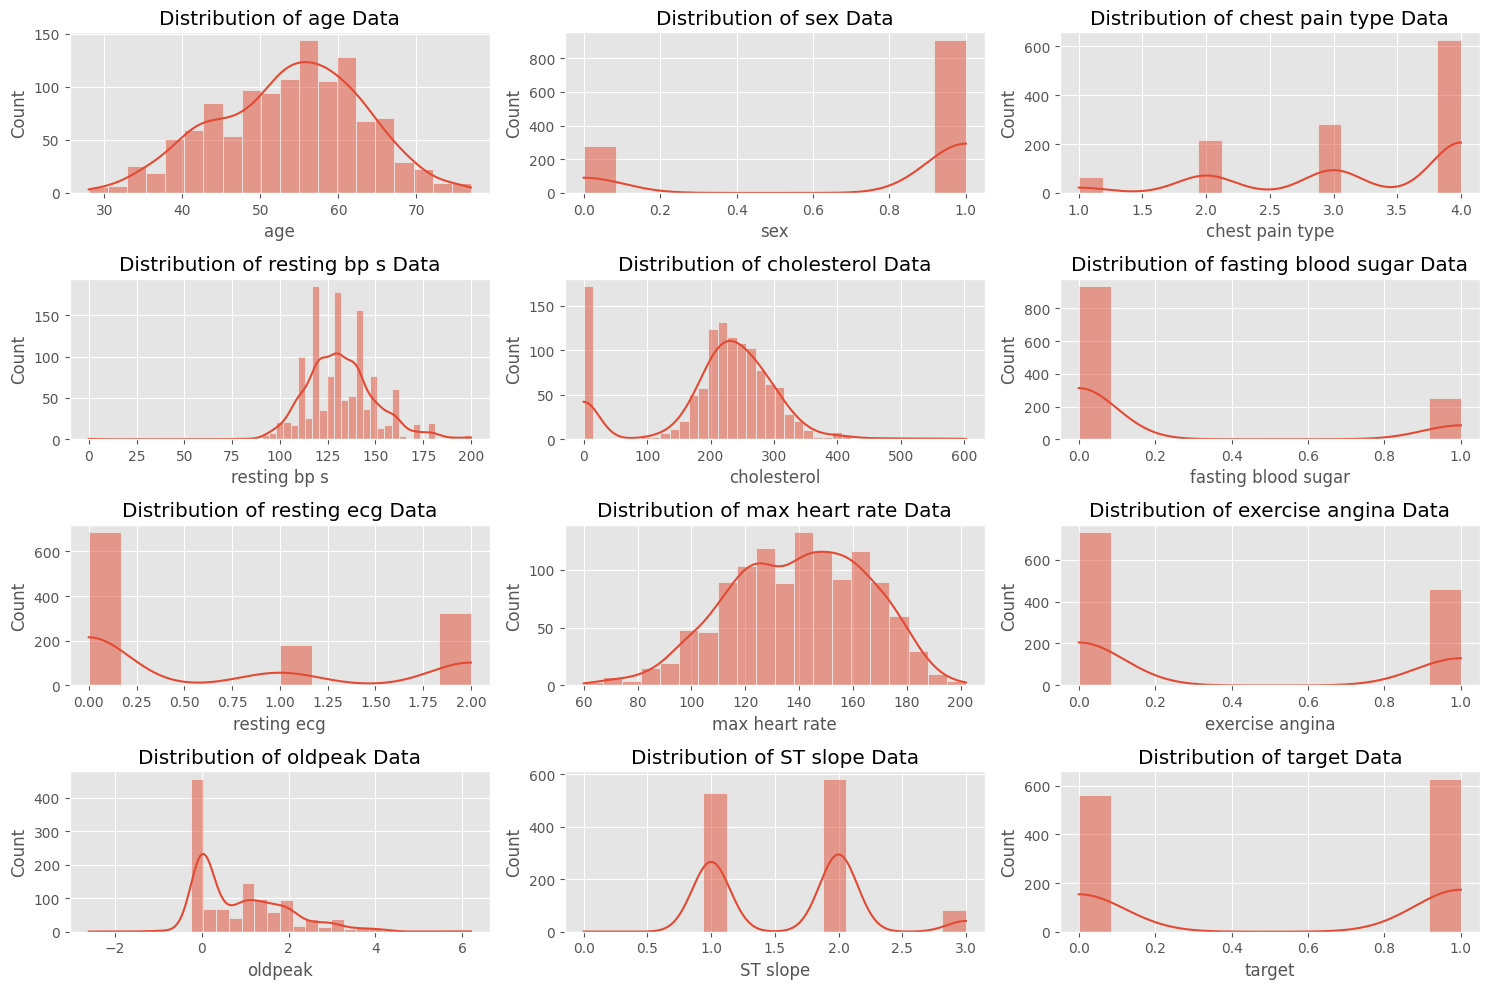

In [56]:
plt.figure(figsize=(15,10))
for i,col in enumerate(disease.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(disease[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [226]:
fig = px.box(disease,y="age",x="target",title=f"Distribution of Age")
fig.show()

In [227]:
fig = px.box(disease,y="resting bp s",x="target",title=f"Distribution of Resting BP",color="sex")
fig.show()

In [228]:
fig = px.box(disease,y="cholesterol",x="target",title=f"Distribution of Cholesterol")
fig.show()

In [229]:
fig = px.box(disease,y="oldpeak",x="target",title=f"Distribution of Oldpeak")
fig.show()

In [230]:
fig = px.box(disease,y="max heart rate",x="target",title=f"Distribution of MaxHR")
fig.show()

In [ ]:
#Data Pre Processing
#1) Handling Null Values
#2) Feature Scaling
#3) Handling Categorical Variables

In [231]:
# Checking for Type of data
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [232]:
# Checking for NULLs in the data
disease.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [233]:
#Imputing only on cholestrol and resting bp

In [234]:
#Substitute Missing/Zero values with Mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(disease[['cholesterol']])
disease['cholesterol'] = imputer.transform(disease[['cholesterol']])

In [235]:
#Substitute Missing values with Mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(disease[['resting bp s']])
disease['resting bp s'] = imputer.transform(disease[['resting bp s']])

In [236]:
#Feature Scaling
#1) Distance Based Algorithms 
#2) Tree-Based Algorithms :

In [237]:
for col in ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg','ST slope']:
    print(f"The distribution of categorical values in the {col} is : ")
    print(disease[col].value_counts())

The distribution of categorical values in the sex is : 
sex
1    909
0    281
Name: count, dtype: int64
The distribution of categorical values in the chest pain type is : 
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
The distribution of categorical values in the fasting blood sugar is : 
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
The distribution of categorical values in the resting ecg is : 
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
The distribution of categorical values in the ST slope is : 
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64


In [ ]:
#Choosing the right cross validation
    #k-fold cross-validation.
    #Stratified k-fold cross-validation.

In [239]:
## Creaeting one hot encoded features for working with non-tree based algorithms 
disease_nontree = pd.get_dummies(disease,columns=['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg','ST slope'],drop_first=False)
disease_nontree.head()

age  resting bp s  cholesterol  max heart rate  exercise angina  oldpeak  \
0   40         140.0        289.0             172                0      0.0   
1   49         160.0        180.0             156                0      1.0   
2   37         130.0        283.0              98                0      0.0   
3   48         138.0        214.0             108                1      1.5   
4   54         150.0        195.0             122                0      0.0   

   target  sex_0  sex_1  chest pain type_1  ...  chest pain type_4  \
0       0  False   True              False  ...              False   
1       1   True  False              False  ...              False   
2       0  False   True              False  ...              False   
3       1   True  False              False  ...               True   
4       0  False   True              False  ...              False   

   fasting blood sugar_0  fasting blood sugar_1  resting ecg_0  resting ecg_1  \
0                   True                  False           True          False   
1                   True                  False           True          False   
2                   True                  False          False           True   
3                   True                  False           True          False   
4                   True                  False           True          False   

   resting ecg_2  ST slope_0  ST slope_1  ST slope_2  ST slope_3  
0          False       False        True       False       False  
1          False       False       False        True       False  
2          False       False        True       False       False  
3          False       False       False        True       False  
4          False       False        True       False       False  

[5 rows x 22 columns]

In [240]:
# Getting the target column at the end
target  = "target"
y = disease_nontree[target].values
disease_nontree.drop("target",axis=1,inplace=True)
disease_nontree=pd.concat([disease_nontree,disease[target]],axis=1)
disease_nontree.head()

age  resting bp s  cholesterol  max heart rate  exercise angina  oldpeak  \
0   40         140.0        289.0             172                0      0.0   
1   49         160.0        180.0             156                0      1.0   
2   37         130.0        283.0              98                0      0.0   
3   48         138.0        214.0             108                1      1.5   
4   54         150.0        195.0             122                0      0.0   

   sex_0  sex_1  chest pain type_1  chest pain type_2  ...  \
0  False   True              False               True  ...   
1   True  False              False              False  ...   
2  False   True              False               True  ...   
3   True  False              False              False  ...   
4  False   True              False              False  ...   

   fasting blood sugar_0  fasting blood sugar_1  resting ecg_0  resting ecg_1  \
0                   True                  False           True          False   
1                   True                  False           True          False   
2                   True                  False          False           True   
3                   True                  False           True          False   
4                   True                  False           True          False   

   resting ecg_2  ST slope_0  ST slope_1  ST slope_2  ST slope_3  target  
0          False       False        True       False       False       0  
1          False       False       False        True       False       1  
2          False       False        True       False       False       0  
3          False       False       False        True       False       1  
4          False       False        True       False       False       0  

[5 rows x 22 columns]

In [241]:
feature_col_nontree=disease_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [242]:
feature_col_nontree

['age',
 'resting bp s',
 'cholesterol',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'sex_0',
 'sex_1',
 'chest pain type_1',
 'chest pain type_2',
 'chest pain type_3',
 'chest pain type_4',
 'fasting blood sugar_0',
 'fasting blood sugar_1',
 'resting ecg_0',
 'resting ecg_1',
 'resting ecg_2',
 'ST slope_0',
 'ST slope_1',
 'ST slope_2',
 'ST slope_3']

In [250]:
#Logistic Regression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       113
           1       0.91      0.85      0.88       125

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238

The accuracy for Fold 1 : 0.8797522123893804
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       112
           1       0.82      0.93      0.87       126

    accuracy                           0.86       238
   macro avg       0.87      0.85      0.85       238
weighted avg       0.86      0.86      0.86       238

The accuracy for Fold 2 : 0.8526785714285714
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       112
           1       0.83      0.98      0.90       126

    accuracy                       

In [255]:
y

array([0, 1, 0, ..., 1, 1, 0])

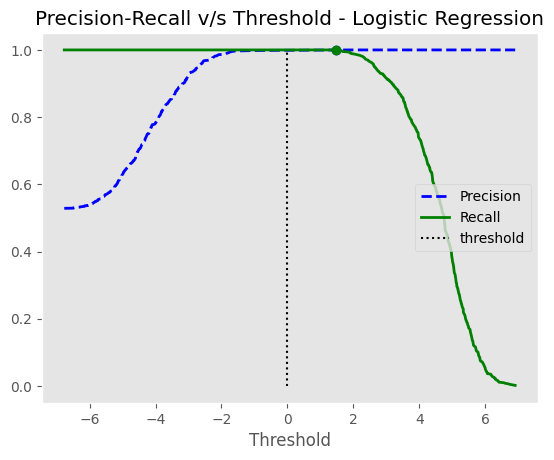

In [257]:
#precision-recall versus threshold to determine decision boundary
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, disease_nontree, y, cv=5, method="decision_function") #decision_function
from sklearn.metrics import precision_recall_curve
threshold = 0
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
#plt.axis([-8, 5, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall v/s Threshold - Logistic Regression")
plt.show()

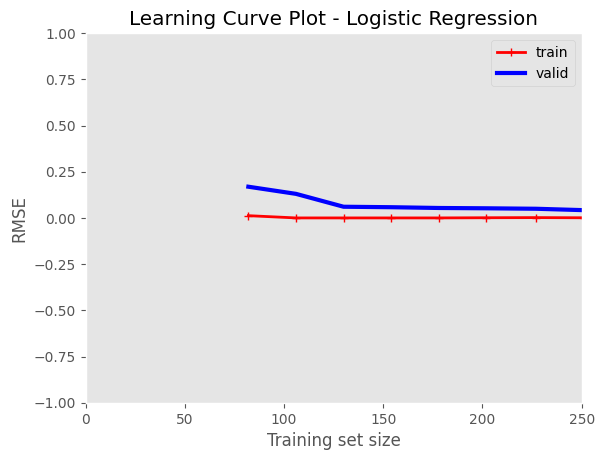

In [253]:
#Learning Curve Plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, disease_nontree,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-",  linewidth=3, label="valid")
plt.legend(loc  ="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 250, -1, 1])
plt.title("Learning Curve Plot - Logistic Regression")
plt.show()

In [258]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       113
           1       0.96      0.41      0.57       125

    accuracy                           0.68       238
   macro avg       0.78      0.70      0.66       238
weighted avg       0.79      0.68      0.65       238

The accuracy for 1 : 0.695150442477876
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       112
           1       0.88      0.56      0.69       126

    accuracy                           0.73       238
   macro avg       0.76      0.74      0.72       238
weighted avg       0.77      0.73      0.72       238

The accuracy for 2 : 0.7371031746031746
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       112
           1       0.80      0.96      0.87       126

    accuracy                           0.85   

In [260]:
#precision-recall versus threshold to determine decision boundary
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, disease_nontree, y, cv=5, method="decision_function")
from sklearn.metrics import precision_recall_curve
threshold = 0
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
#plt.axis([-8, 5, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall v/s Threshold - Naive Bayes")
plt.show()

AttributeError: 'GaussianNB' object has no attribute 'decision_function'

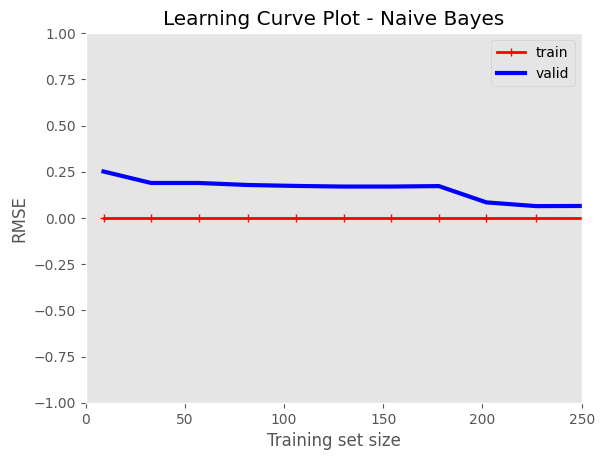

In [150]:
#Learning Curve Plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, disease_nontree,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-",  linewidth=3, label="valid")
plt.legend(loc  ="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 250, -1, 1])
plt.title("Learning Curve Plot - Naive Bayes")
plt.show()

In [262]:
#SVM Linear Kernel
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       113
           1       0.92      0.87      0.90       125

    accuracy                           0.89       238
   macro avg       0.90      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238

The accuracy for 1 : 0.8961769911504425
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       112
           1       0.83      0.90      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

The accuracy for 2 : 0.8452380952380951
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       112
           1       0.81      0.98      0.88       126

    accuracy                           0.87  

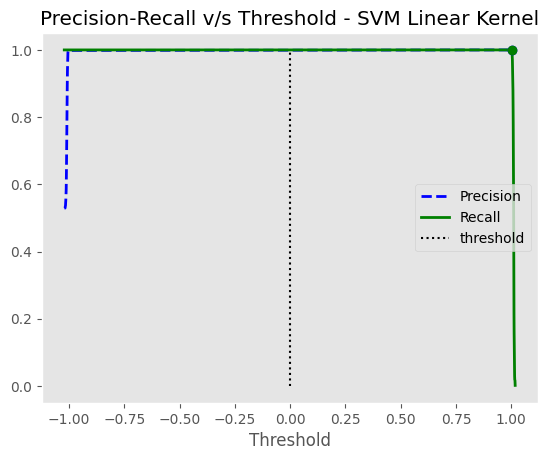

In [263]:
#precision-recall versus threshold to determine decision boundary
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, disease_nontree, y, cv=5, method="decision_function")
from sklearn.metrics import precision_recall_curve
threshold = 0
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
#plt.axis([-8, 5, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall v/s Threshold - SVM Linear Kernel")
plt.show()

In [264]:
#Learning Curve Plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, disease_nontree,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-",  linewidth=3, label="valid")
plt.legend(loc  ="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 250, -1, 1])
plt.title("Learning Curve Plot - SVM Linear Kernel")
plt.show()

KeyboardInterrupt: 

In [92]:
#Sigmoid Kernel
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       113
           1       0.87      0.82      0.84       125

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

The accuracy for 1 : 0.8412035398230088
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       112
           1       0.78      0.89      0.83       126

    accuracy                           0.81       238
   macro avg       0.82      0.81      0.81       238
weighted avg       0.82      0.81      0.81       238

The accuracy for 2 : 0.8060515873015873
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       112
           1       0.75      0.90      0.82       126

    accuracy                           0.79  

In [93]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       113
           1       0.91      0.94      0.93       125

    accuracy                           0.92       238
   macro avg       0.93      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238

The accuracy for 1 : 0.9233274336283185
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       112
           1       0.83      0.91      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238

The accuracy for 2 : 0.8536706349206349
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       112
           1       0.82      0.92      0.87       126

    accuracy                           0.85  

In [94]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       113
           1       0.92      0.90      0.91       125

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238

The accuracy for 1 : 0.9037522123893804
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       112
           1       0.83      0.93      0.88       126

    accuracy                           0.86       238
   macro avg       0.87      0.86      0.86       238
weighted avg       0.87      0.86      0.86       238

The accuracy for 2 : 0.8571428571428572
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       112
           1       0.83      0.92      0.88       126

    accuracy                           0.86  

In [95]:
#KNearest Neighbors
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease_nontree,y=y)):
    X_train=disease_nontree.loc[trn_,feature_col_nontree]
    y_train=disease_nontree.loc[trn_,target]
    
    X_valid=disease_nontree.loc[val_,feature_col_nontree]
    y_valid=disease_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.93      0.90      0.91       125

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238

The accuracy for 1 : 0.9121769911504425
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       112
           1       0.85      0.91      0.88       126

    accuracy                           0.87       238
   macro avg       0.87      0.86      0.86       238
weighted avg       0.87      0.87      0.86       238

The accuracy for 2 : 0.8625992063492063
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       112
           1       0.79      0.94      0.86       126

    accuracy                           0.84  

In [170]:
disease_nontree

age  resting bp s  cholesterol  max heart rate  exercise angina  \
0      40    140.000000    289.00000             172                0   
1      49    160.000000    180.00000             156                0   
2      37    130.000000    283.00000              98                0   
3      48    138.000000    214.00000             108                1   
4      54    150.000000    195.00000             122                0   
5      39    120.000000    339.00000             170                0   
6      45    130.000000    237.00000             170                0   
7      54    110.000000    208.00000             142                0   
8      37    140.000000    207.00000             130                1   
9      48    120.000000    284.00000             120                0   
10     37    130.000000    211.00000             142                0   
11     58    136.000000    164.00000              99                1   
12     39    120.000000    204.00000             145                0   
13     49    140.000000    234.00000             140                1   
14     42    115.000000    211.00000             137                0   
15     54    120.000000    273.00000             150                0   
16     38    110.000000    196.00000             166                0   
17     43    120.000000    201.00000             165                0   
18     60    100.000000    248.00000             125                0   
19     36    120.000000    267.00000             160                0   
20     43    100.000000    223.00000             142                0   
21     44    120.000000    184.00000             142                0   
22     49    124.000000    201.00000             164                0   
23     44    150.000000    288.00000             150                1   
24     40    130.000000    215.00000             138                0   
25     36    130.000000    209.00000             178                0   
26     53    124.000000    260.00000             112                1   
27     52    120.000000    284.00000             118                0   
28     53    113.000000    468.00000             127                0   
29     51    125.000000    188.00000             145                0   
30     53    145.000000    518.00000             130                0   
31     56    130.000000    167.00000             114                0   
32     54    125.000000    224.00000             122                0   
33     41    130.000000    172.00000             130                0   
34     43    150.000000    186.00000             154                0   
35     32    125.000000    254.00000             155                0   
36     65    140.000000    306.00000              87                1   
37     41    110.000000    250.00000             142                0   
38     48    120.000000    177.00000             148                0   
39     48    150.000000    227.00000             130                1   
40     54    150.000000    230.00000             130                0   
41     54    130.000000    294.00000             100                1   
42     35    150.000000    264.00000             168                0   
43     52    140.000000    259.00000             170                0   
44     43    120.000000    175.00000             120                1   
45     59    130.000000    318.00000             120                1   
46     37    120.000000    223.00000             168                0   
47     50    140.000000    216.00000             170                0   
48     36    112.000000    340.00000             184                0   
49     41    110.000000    289.00000             170                0   
50     50    130.000000    233.00000             121                1   
51     47    120.000000    205.00000              98                1   
52     45    140.000000    224.00000             122                0   
53     41    130.000000    245.00000             150            

In [178]:
#Uisng Decision Trees
feature_col_tree=disease.columns.to_list()
feature_col_tree.remove(target)
feature_col_tree

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

In [185]:
# Getting the target column at the end
target  = "target"
y       = disease[target].values
disease_tree = disease.drop("target",axis=1)
disease_tree

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
5      39    1                3           120          339   
6      45    0                2           130          237   
7      54    1                2           110          208   
8      37    1                4           140          207   
9      48    0                2           120          284   
10     37    0                3           130          211   
11     58    1                2           136          164   
12     39    1                2           120          204   
13     49    1                4           140          234   
14     42    0                3           115          211   
15     54    0                2           120          273   
16     38    1                4           110          196   
17     43    0                2           120          201   
18     60    1                4           100          248   
19     36    1                2           120          267   
20     43    0                1           100          223   
21     44    1                2           120          184   
22     49    0                2           124          201   
23     44    1                2           150          288   
24     40    1                3           130          215   
25     36    1                3           130          209   
26     53    1                4           124          260   
27     52    1                2           120          284   
28     53    0                2           113          468   
29     51    1                2           125          188   
30     53    1                3           145          518   
31     56    1                3           130          167   
32     54    1                4           125          224   
33     41    1                4           130          172   
34     43    0                2           150          186   
35     32    1                2           125          254   
36     65    1                4           140          306   
37     41    0                2           110          250   
38     48    0                2           120          177   
39     48    0                4           150          227   
40     54    0                2           150          230   
41     54    0                3           130          294   
42     35    1                2           150          264   
43     52    1                3           140          259   
44     43    1                4           120          175   
45     59    1                3           130          318   
46     37    1                4           120          223   
47     50    1                2           140          216   
48     36    1                3           112          340   
49     41    1                4           110          289   
50     50    1                4           130          233   
51     47    0                4           120          205   
52     45    1                2           140          224   
53     41    0                2           130          245   
54     52    0                4           130          180   
55     51    0                2           160          194   
56     31    1                4           120          270   
57     58    1                3           130          213   
58     54    1                4           150          365   
59     52    1                4           112          342   
60     49    1                2           100          253   
61     43    0                3           150          254   
62     45    1                4           140          224   
63     46    1                4       

In [186]:
disease

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
5      39    1                3           120          339   
6      45    0                2           130          237   
7      54    1                2           110          208   
8      37    1                4           140          207   
9      48    0                2           120          284   
10     37    0                3           130          211   
11     58    1                2           136          164   
12     39    1                2           120          204   
13     49    1                4           140          234   
14     42    0                3           115          211   
15     54    0                2           120          273   
16     38    1                4           110          196   
17     43    0                2           120          201   
18     60    1                4           100          248   
19     36    1                2           120          267   
20     43    0                1           100          223   
21     44    1                2           120          184   
22     49    0                2           124          201   
23     44    1                2           150          288   
24     40    1                3           130          215   
25     36    1                3           130          209   
26     53    1                4           124          260   
27     52    1                2           120          284   
28     53    0                2           113          468   
29     51    1                2           125          188   
30     53    1                3           145          518   
31     56    1                3           130          167   
32     54    1                4           125          224   
33     41    1                4           130          172   
34     43    0                2           150          186   
35     32    1                2           125          254   
36     65    1                4           140          306   
37     41    0                2           110          250   
38     48    0                2           120          177   
39     48    0                4           150          227   
40     54    0                2           150          230   
41     54    0                3           130          294   
42     35    1                2           150          264   
43     52    1                3           140          259   
44     43    1                4           120          175   
45     59    1                3           130          318   
46     37    1                4           120          223   
47     50    1                2           140          216   
48     36    1                3           112          340   
49     41    1                4           110          289   
50     50    1                4           130          233   
51     47    0                4           120          205   
52     45    1                2           140          224   
53     41    0                2           130          245   
54     52    0                4           130          180   
55     51    0                2           160          194   
56     31    1                4           120          270   
57     58    1                3           130          213   
58     54    1                4           150          365   
59     52    1                4           112          342   
60     49    1                2           100          253   
61     43    0                3           150          254   
62     45    1                4           140          224   
63     46    1                4       

In [179]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease,y=y)):
    
    X_train=disease.loc[trn_,feature_col_tree]
    y_train=disease.loc[trn_,target]
    
    X_valid=disease.loc[val_,feature_col_tree]
    y_valid=disease.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       113
           1       0.88      0.71      0.79       125

    accuracy                           0.80       238
   macro avg       0.81      0.80      0.80       238
weighted avg       0.81      0.80      0.80       238

The accuracy for 1 : 0.8029026548672566
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       112
           1       0.80      0.85      0.82       126

    accuracy                           0.81       238
   macro avg       0.81      0.80      0.81       238
weighted avg       0.81      0.81      0.81       238

The accuracy for 2 : 0.8040674603174603
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       112
           1       0.96      0.89      0.92       126

    accuracy                           0.92  

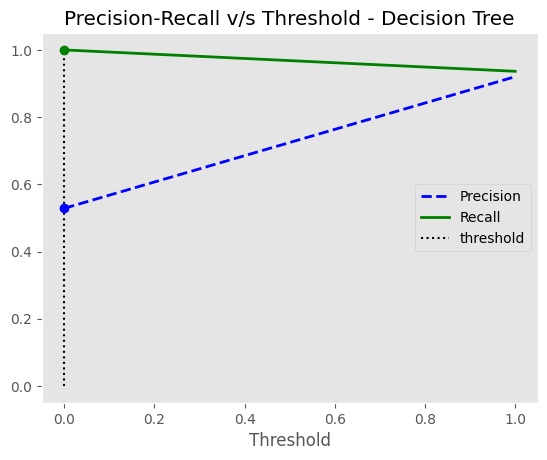

In [189]:
#precision-recall versus threshold to determine decision boundary
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, disease_tree, y, cv=5, method="predict")
from sklearn.metrics import precision_recall_curve
threshold = 0
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
#plt.axis([-8, 5, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall v/s Threshold - Decision Tree")
plt.show()

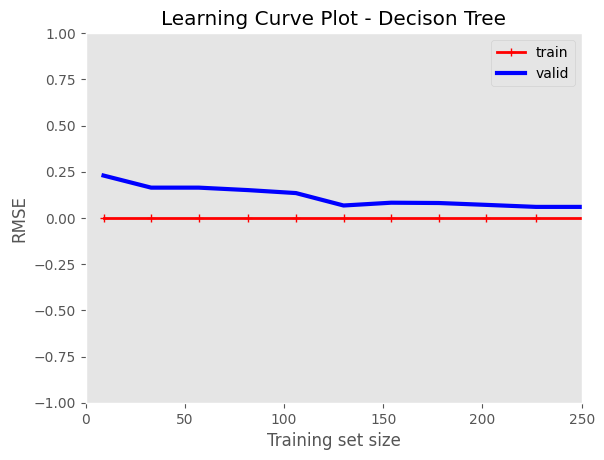

In [192]:
#Learning Curve Plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, disease_nontree,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-",  linewidth=3, label="valid")
plt.legend(loc  ="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 250, -1, 1])
plt.title("Learning Curve Plot - Decison Tree")
plt.show()

In [180]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

InvalidParameterError: The 'class_names' parameter of export_graphviz must be an array-like, an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int' or None. Got 'target' instead.

In [191]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease,y=y)):
    
    X_train=disease.loc[trn_,feature_col_tree]
    y_train=disease.loc[trn_,target]
    
    X_valid=disease.loc[val_,feature_col_tree]
    y_valid=disease.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")


The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       113
           1       0.95      0.86      0.90       125

    accuracy                           0.90       238
   macro avg       0.91      0.91      0.90       238
weighted avg       0.91      0.90      0.90       238

The accuracy for 1 : 0.9054513274336282
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       112
           1       0.85      0.98      0.91       126

    accuracy                           0.90       238
   macro avg       0.91      0.89      0.90       238
weighted avg       0.91      0.90      0.90       238

The accuracy for 2 : 0.8938492063492064
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       112
           1       0.95      0.96      0.96       126

    accuracy                           0.95  

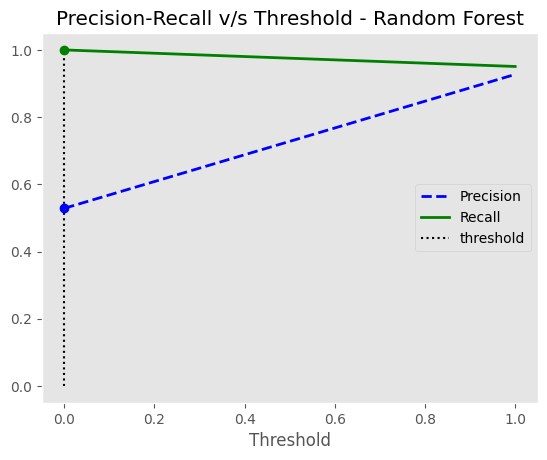

In [195]:
#precision-recall versus threshold to determine decision boundary
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, disease_tree, y, cv=5, method="predict")
from sklearn.metrics import precision_recall_curve
threshold = 0
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
#plt.axis([-8, 5, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall v/s Threshold - Random Forest")
plt.show()

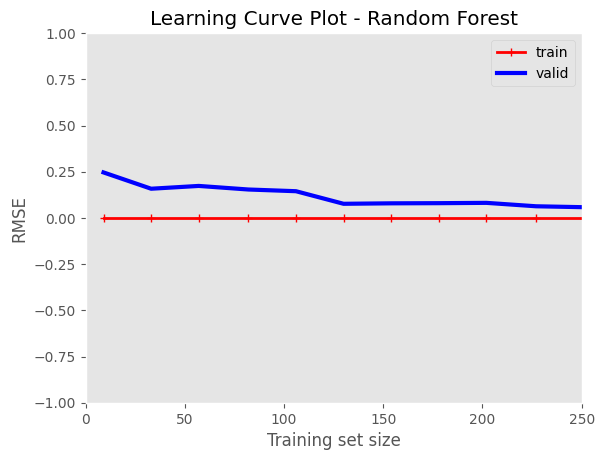

In [194]:
#Learning Curve Plot
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(clf, disease_nontree,y, train_sizes=np.linspace(0.01, 1.0,40), cv=5, scoring="neg_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-",  linewidth=3, label="valid")
plt.legend(loc  ="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 250, -1, 1])
plt.title("Learning Curve Plot - Random Forest")
plt.show()

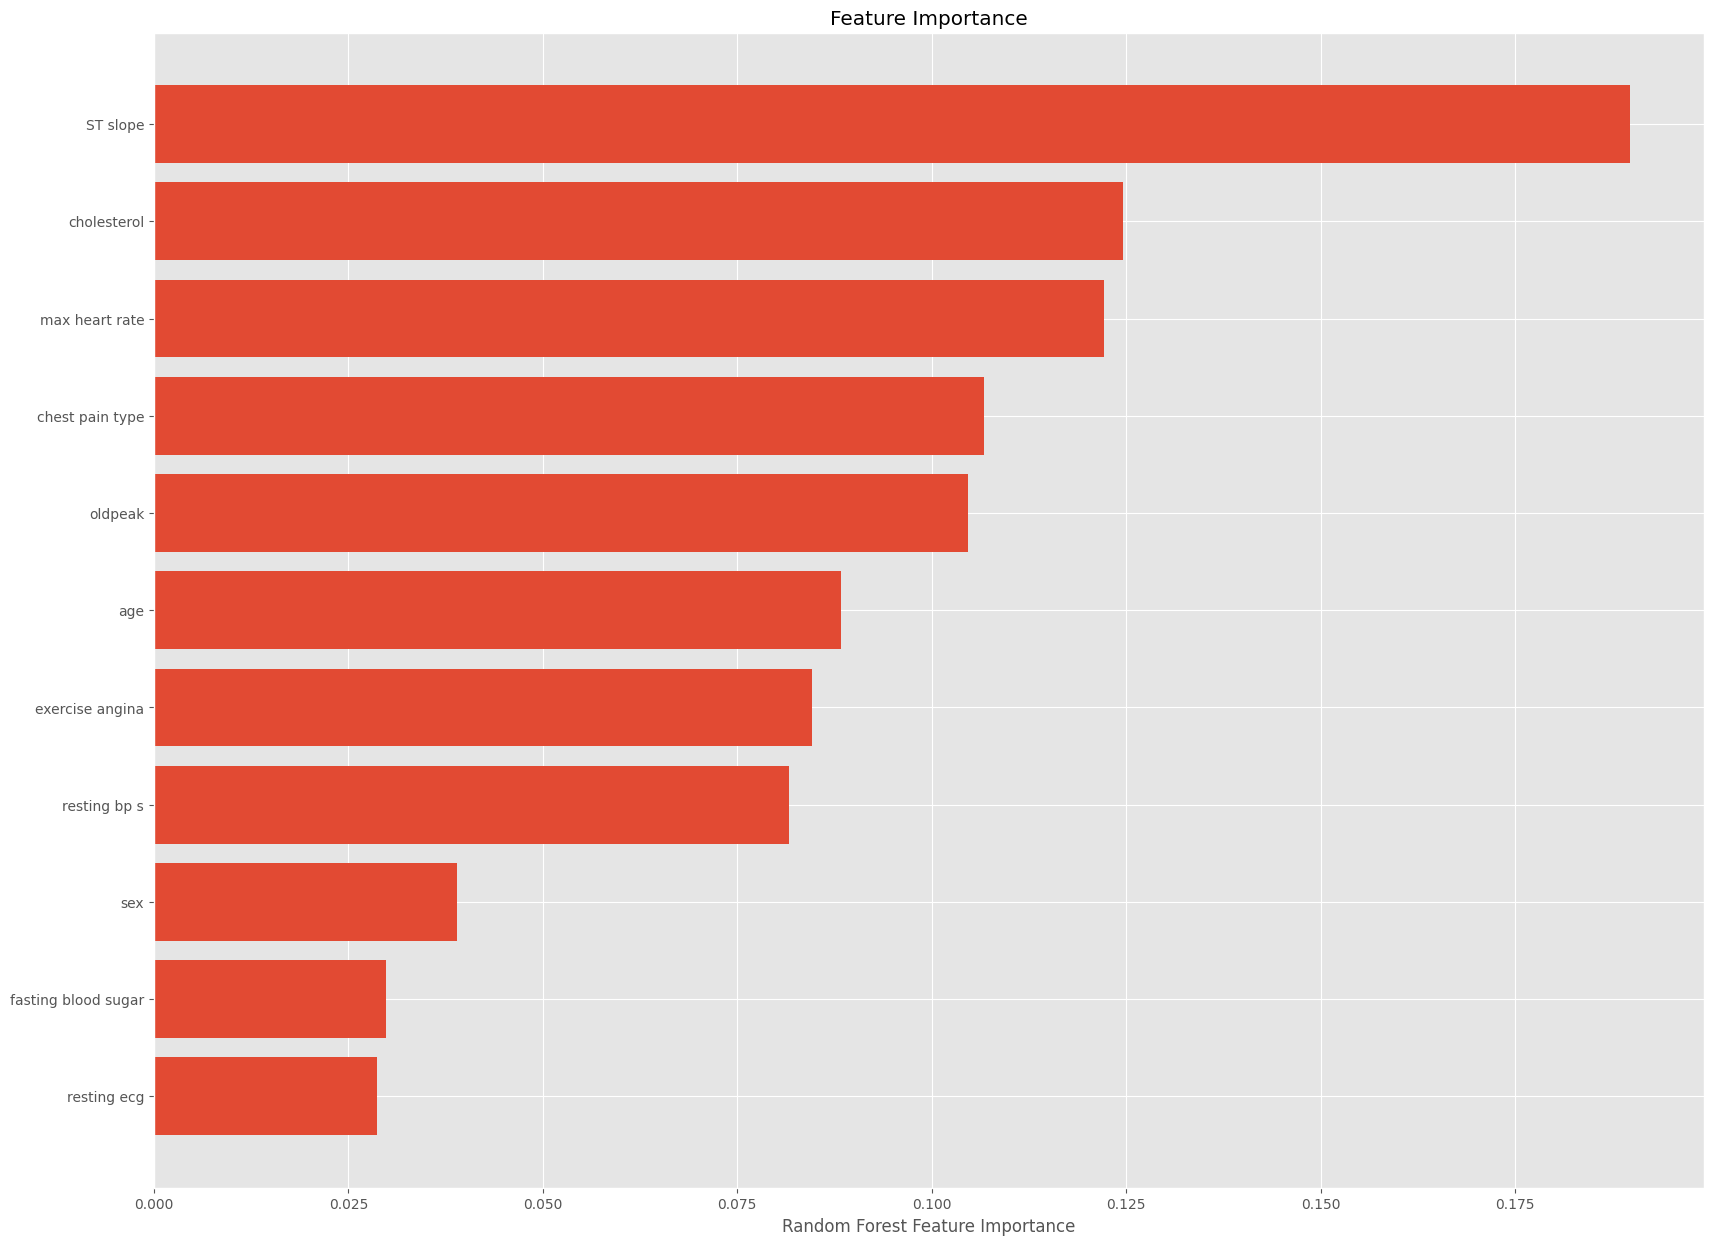

In [182]:
## Checking Feature importance 
plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [183]:
#Using XGBoost
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=disease,y=y)):
    
    X_train=disease.loc[trn_,feature_col_tree]
    y_train=disease.loc[trn_,target]
    
    X_valid=disease.loc[val_,feature_col_tree]
    y_valid=disease.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       113
           1       0.94      0.82      0.88       125

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238

The accuracy for 1 : 0.8810265486725662
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       112
           1       0.83      0.99      0.90       126

    accuracy                           0.89       238
   macro avg       0.91      0.88      0.88       238
weighted avg       0.90      0.89      0.88       238

The accuracy for 2 : 0.8799603174603174
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       112
           1       0.95      0.94      0.95       126

    accuracy                           0.95  